## Image compression by PCA

(512, 512, 3)


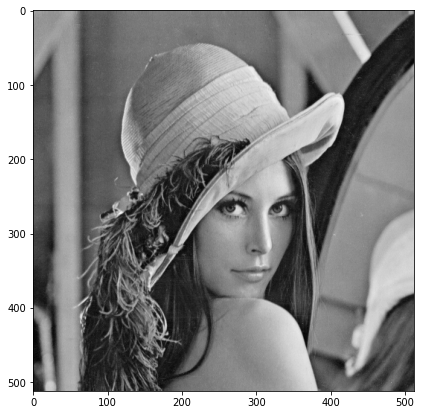

In [39]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

img = imread(".\\lena_image\\lenna.png")
#img = img.astype(np.uint8)
print(img.shape)
img = img.mean(axis=2)
plt.imshow(img, cmap="gray")

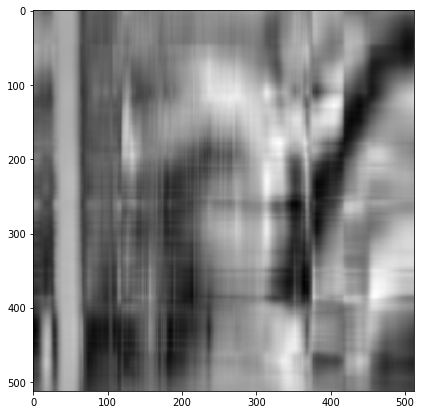

In [40]:
from sklearn.decomposition import PCA
lenna_pca = PCA(n_components=5).fit(img)
transformed = lenna_pca.transform(img)
projected = lenna_pca.inverse_transform(transformed)
plt.imshow(projected, cmap="gray")

## Image Compression by DCT

In [27]:
# This is a great demo of the Discrete Cosine Transform (DCT) and is the essence of JPEG encoding. 
# The demo was originally created by Frank Ong.
# https://inst.eecs.berkeley.edu/~ee123/sp16/Sections/JPEG_DCT_Demo.html
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal


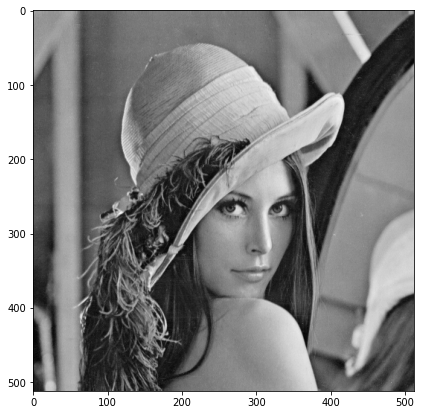

In [28]:
plt.imshow(img,cmap='gray')

In [13]:
# define 2d DCT and IDCT
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [16]:
# Perform a blockwise DCT
imsize = img.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( img[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, 'An 8x8 DCT block')

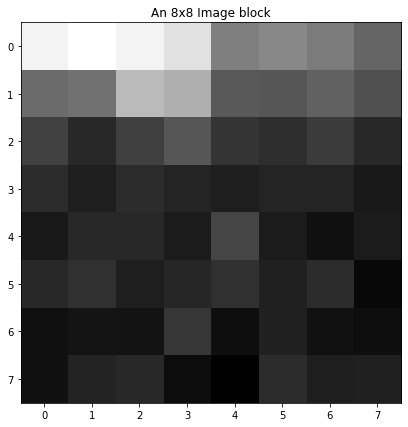

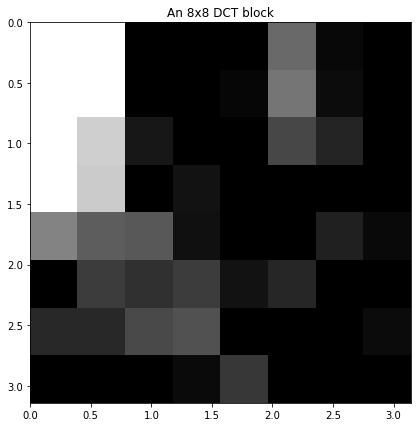

In [29]:
# Extract 8x8 block and look at its DCT coefficients
pos = 256

# Extract a block from image
plt.figure()
plt.imshow(img[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

Text(0.5, 1.0, '8x8 DCTs of the image')

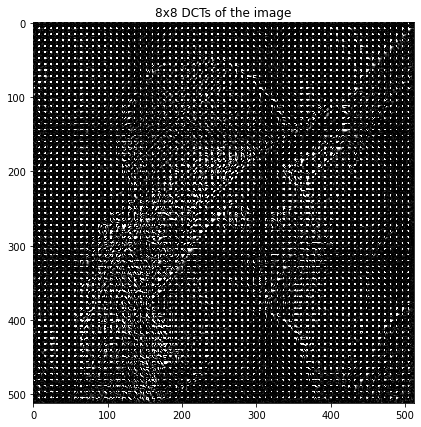

In [30]:
#Display all DCT blocks.entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Keeping only 58.44% of the DCT coefficients


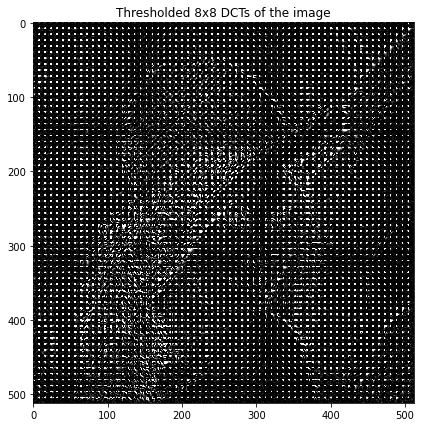

In [62]:
# Threshold DCT coefficients

thresh = 0.001
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only {:.2f}% of the DCT coefficients".format(percent_nonzeros*100.0))

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

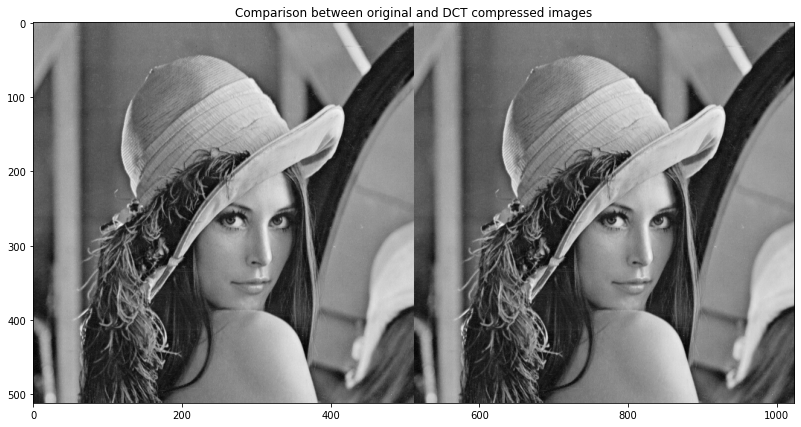

In [61]:
# Compare DCT compressed image with original

im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )